In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [99]:
file_path_1 = 'tmall_order_report.csv'


In [100]:
file_1_data = pd.read_csv(file_path_1)


In [101]:
file_1_data.info()  # 数据集情况 28010 条，6个字段
#file_1_data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


In [102]:
file_1_data.columns=['订单编号','总金额','买家实际支付金额','收货地址','订单创建时间','订单付款时间','退款金额']

In [103]:
file_1_data[file_1_data.duplicated()].count()  # 没有完全重复的数据

订单编号        0
总金额         0
买家实际支付金额    0
收货地址        0
订单创建时间      0
订单付款时间      0
退款金额        0
dtype: int64

In [104]:
# 清理列名——列名有空格 
file_1_data.columns = file_1_data.columns.str.strip()

In [105]:
file_1_data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址', '订单创建时间', '订单付款时间', '退款金额'], dtype='object')

In [106]:
file_1_data['订单创建时间']=pd.to_datetime(file_1_data['订单创建时间'])
file_1_data['订单付款时间']=pd.to_datetime(file_1_data['订单付款时间'],errors='ignore')

C:\Users\Cyan\AppData\Local\Temp\ipykernel_20032\3756465605.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  file_1_data['订单付款时间']=pd.to_datetime(file_1_data['订单付款时间'],errors='ignore')


In [107]:
file_1_data['创建日期'] = file_1_data['订单创建时间'].dt.strftime('%m-%d')
file_1_data['付款日期'] = file_1_data['订单付款时间'].dt.strftime('%m-%d')
file_1_data['创建时刻'] = file_1_data['订单创建时间'].dt.strftime('%H')
file_1_data['付款时刻'] = file_1_data['订单付款时间'].dt.strftime('%H')
file_1_data['创建星期'] = file_1_data['订单创建时间'].dt.strftime('%w') #0表示周天 ，6表示周六
file_1_data['付款星期'] = file_1_data['订单付款时间'].dt.strftime('%w')

In [108]:
file_1_data['创建星期']=file_1_data['创建星期'].replace(['0','1','2','3','4','5','6'],['周天','周一','周二','周三','周四','周五','周六'])
file_1_data['付款星期']=file_1_data['付款星期'].replace(['0','1','2','3','4','5','6'],['周天','周一','周二','周三','周四','周五','周六'])

In [109]:
#简化收货地址
#处理前的地址
file_1_data['收货地址'].unique()

array(['上海', '内蒙古自治区', '安徽省', '湖南省', '江苏省', '浙江省', '天津', '北京', '四川省',
       '贵州省', '辽宁省', '河南省', '广西壮族自治区', '广东省', '福建省', '海南省', '江西省', '甘肃省',
       '河北省', '黑龙江省', '云南省', '重庆', '山西省', '吉林省', '山东省', '陕西省', '湖北省',
       '青海省', '新疆维吾尔自治区', '宁夏回族自治区', '西藏自治区'], dtype=object)

In [110]:
file_1_data['收货地址']=file_1_data['收货地址'].str.replace('省','').str.replace('市','').str.replace('自治区','')
file_1_data['收货地址']=file_1_data['收货地址'].str.replace('壮族','').str.replace('维吾尔','').str.replace('回族','')

#处理后的地址
file_1_data['收货地址'].unique()

array(['上海', '内蒙古', '安徽', '湖南', '江苏', '浙江', '天津', '北京', '四川', '贵州', '辽宁',
       '河南', '广西', '广东', '福建', '海南', '江西', '甘肃', '河北', '黑龙江', '云南', '重庆',
       '山西', '吉林', '山东', '陕西', '湖北', '青海', '新疆', '宁夏', '西藏'], dtype=object)

In [111]:
#缺失值处理
file_1_data['订单付款时间'].isnull().sum()
file_1_data[file_1_data['订单付款时间'].isnull() & file_1_data['买家实际支付金额']>0].size

0

In [112]:
file_1_data.describe()

,订单编号,总金额,买家实际支付金额,订单创建时间,订单付款时间,退款金额
count,28010.000000,28010.000000,28010.000000,28010,24087,28010.000000
mean,14005.500000,106.953253,67.921712,2020-02-23 07:27:23.652231168,2020-02-23 06:41:07.456303872,20.433271
min,1.000000,1.000000,0.000000,2020-02-01 00:14:15,2020-02-01 00:14:20,0.000000
25%,7003.250000,38.000000,0.000000,2020-02-21 14:24:00.750000128,2020-02-21 14:23:17.500000,0.000000
50%,14005.500000,75.000000,45.000000,2020-02-24 21:59:01,2020-02-24 22:17:37,0.000000
75%,21007.750000,119.000000,101.000000,2020-02-27 09:39:32,2020-02-27 10:05:54.500000,0.000000
max,28010.000000,188320.000000,16065.000000,2020-02-29 23:59:18,2020-03-01 19:25:42,3800.000000
std,8085.934856,1136.587094,151.493434,NaN,NaN,71.501963


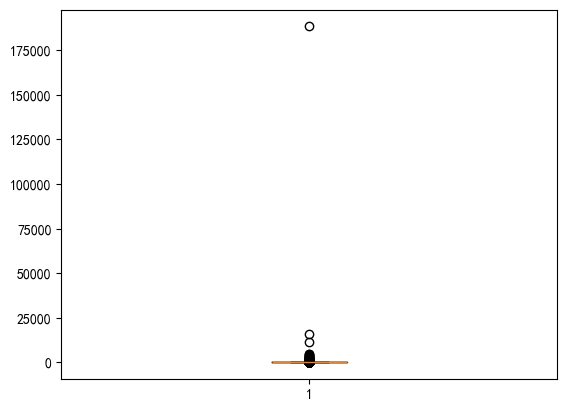

In [113]:
plt.boxplot(file_1_data['总金额'])
plt.show()

In [114]:
file_1_data[file_1_data['总金额']>175000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建日期,付款日期,创建时刻,付款时刻,创建星期,付款星期
19257,19258,188320.0,0.0,上海,2020-02-24 19:35:06,NaT,0.0,02-24,NaN,19,NaN,周一,NaN


In [115]:
file_1_data=file_1_data.drop(index=19257)  #删除此条数据

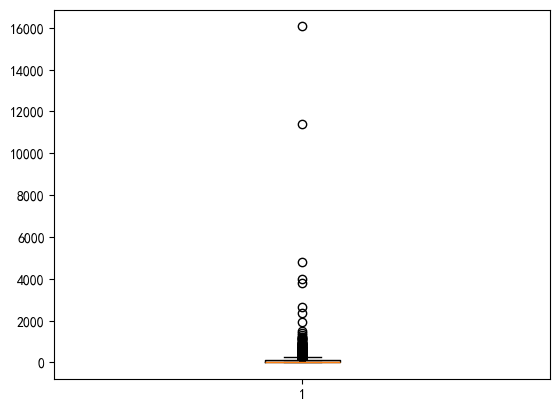

In [116]:
#"买家实际支付金额"异常处理:从数据来看，应该没有问题，不处理
plt.boxplot(file_1_data['买家实际支付金额'])
plt.show()

In [117]:
file_1_data[file_1_data['买家实际支付金额']>10000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建日期,付款日期,创建时刻,付款时刻,创建星期,付款星期
3143,3144,11400.0,11400.0,江苏,2020-02-18 09:34:43,2020-02-18 09:34:53,0.0,02-18,02-18,09,09,周二,周二
13511,13512,16065.0,16065.0,内蒙古,2020-02-26 15:41:27,2020-02-26 15:42:24,0.0,02-26,02-26,15,15,周三,周三


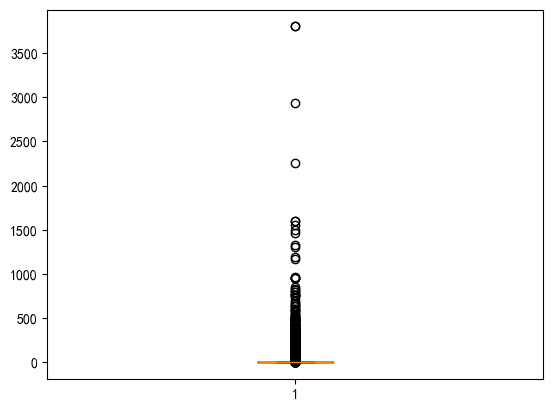

In [118]:
#"退款金额"异常处理:退款金额与总金额一致，也不需要处理
plt.boxplot(file_1_data['退款金额'])
plt.show()

In [119]:
file_1_data[file_1_data['退款金额']>2000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建日期,付款日期,创建时刻,付款时刻,创建星期,付款星期
3841,3842,3800.0,0.0,广东,2020-02-09 23:50:33,2020-02-10 00:52:40,3800.0,02-09,02-10,23,00,周天,周一
5764,5765,3800.0,0.0,河南,2020-02-02 16:52:17,2020-02-02 16:52:22,3800.0,02-02,02-02,16,16,周天,周天
10163,10164,2930.2,0.0,山东,2020-02-22 01:59:50,2020-02-22 01:59:52,2930.2,02-22,02-22,01,01,周六,周六
24941,24942,2260.0,0.0,安徽,2020-02-28 09:52:32,2020-02-28 09:52:43,2260.0,02-28,02-28,09,09,周五,周五


In [120]:
#检查是否有完全重复的行：没有
file_1_data[file_1_data.duplicated()] 

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建日期,付款日期,创建时刻,付款时刻,创建星期,付款星期


In [121]:
#数据分析
#描述统计分析
#由于"买家实际支付金额"和"退款金额"中含大量0值，会导致描述统计分析失真，所以先处理
df1=file_1_data
df1['买家实际支付金额']=np.where(df1['订单付款时间'].isnull(),np.nan,df1['买家实际支付金额'])
df1['退款金额']=df1['退款金额'].replace(0,np.nan)
df1['买家实际支付金额']=df1['买家实际支付金额'].replace(0,np.nan)
df1.describe()  #处理后的描述统计信息

,订单编号,总金额,买家实际支付金额,订单创建时间,订单付款时间,退款金额
count,28009.000000,28009.000000,18955.000000,28009,24087,5646.000000
mean,14005.312471,100.233518,100.368618,2020-02-23 07:27:19.008639744,2020-02-23 06:41:07.456304384,101.370159
min,1.000000,1.000000,1.000000,2020-02-01 00:14:15,2020-02-01 00:14:20,1.000000
25%,7003.000000,38.000000,43.000000,2020-02-21 14:23:47,2020-02-21 14:23:17.500000,38.000000
50%,14005.000000,75.000000,76.000000,2020-02-24 21:59:17,2020-02-24 22:17:37,76.000000
75%,21008.000000,119.000000,119.000000,2020-02-27 09:39:44,2020-02-27 10:05:54.500000,119.000000
max,28010.000000,16065.000000,16065.000000,2020-02-29 23:59:18,2020-03-01 19:25:42,3800.000000
std,8086.018294,164.451538,175.093100,NaN,NaN,130.999959


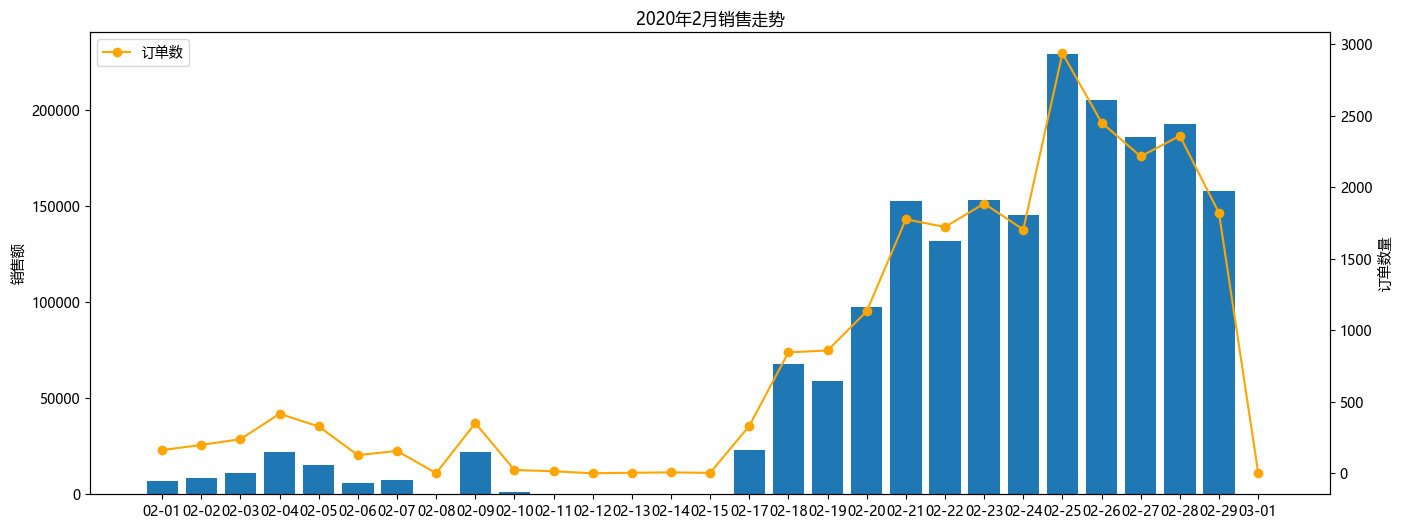

In [122]:
#销售趋势分析
#日销售趋势
# 筛选出非空的付款日期数据
filtered_data = file_1_data[file_1_data['付款日期'].notnull()]

# 按照付款日期分组计算销售额总和和订单数量
df_sum = filtered_data.groupby('付款日期')['买家实际支付金额'].sum()  # 销售额总和
df_count = filtered_data.groupby('付款日期')['订单编号'].count()    # 订单数量

# 中文乱码处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.figure(figsize=(16, 6))

# 左侧柱状图：销售额
plt.bar(df_sum.index, df_sum, label='销售额')
plt.ylabel('销售额')

# 右侧折线图：订单数量
plt.twinx()  # 创建双y轴
plt.plot(df_count.index, df_count, color='orange', label='订单数', marker='o')
plt.ylabel('订单数量')

# 图表美化
plt.title('2020年2月销售走势')
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=30)
plt.legend(loc='upper left')

plt.show()


C:\Users\Cyan\AppData\Local\Temp\ipykernel_20032\2758015337.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = file_1_data.groupby('付款星期')


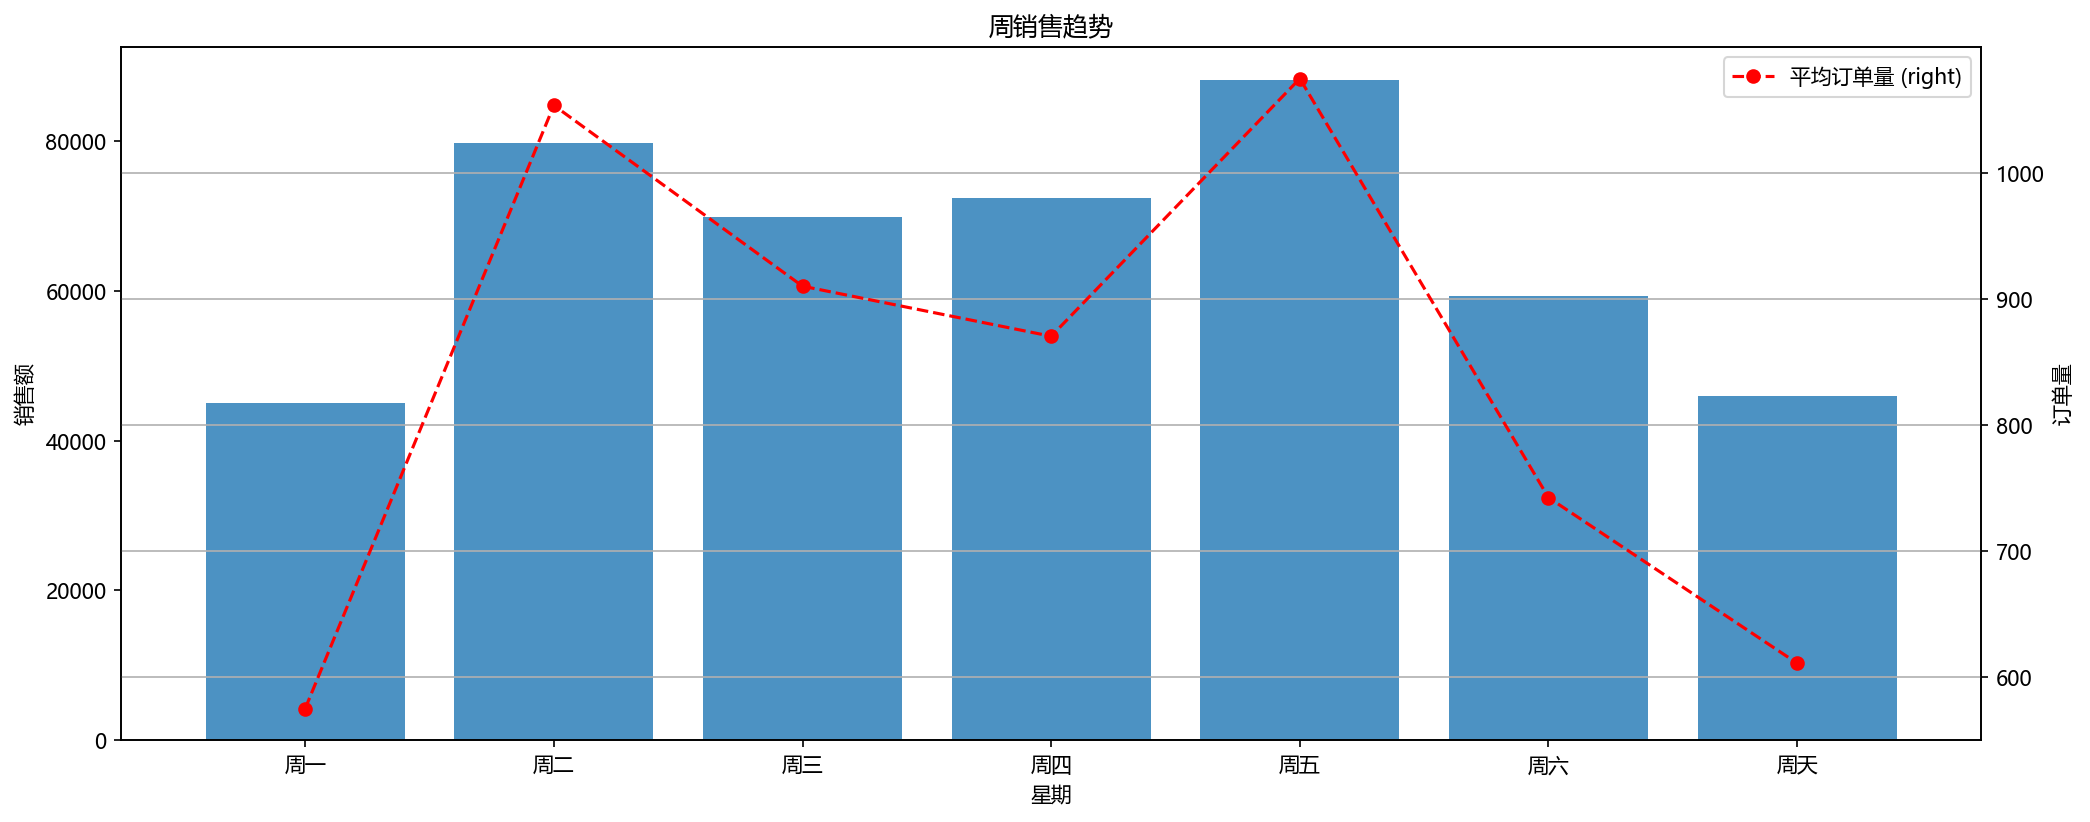

In [123]:
# 定义星期顺序
week_list = ['周一', '周二', '周三', '周四', '周五', '周六', '周天']

# 确保 '付款星期' 是分类数据
file_1_data['付款星期'] = pd.Categorical(file_1_data['付款星期'], categories=week_list, ordered=True)

# 计算分组数据
grouped = file_1_data.groupby('付款星期')
week_sum = grouped['买家实际支付金额'].sum()
week_count = grouped['订单编号'].count()

# 按每月天数计算平均值（每月有4周，周六一般多一天）
days_in_week = [4, 4, 4, 4, 4, 5, 4]  # 根据每月的实际分布调整
week_sum_mean = week_sum / days_in_week
week_count_mean = week_count / days_in_week

# 创建 DataFrame
df_week = pd.DataFrame({
    '平均实际付款金额': week_sum_mean,
    '平均订单量': week_count_mean
})
df_week.index.name = '星期'

# 绘制图表
plt.figure(figsize=(16, 6), dpi=150)

# 销售额柱状图
plt.bar(df_week.index, df_week['平均实际付款金额'], alpha=0.8, label='平均实际付款金额')
plt.ylabel('销售额')

# 订单量折线图
df_week['平均订单量'].plot(color='red', style='--o', secondary_y=True, label='平均订单量')
plt.ylabel('订单量')

# 图表标题与网格
plt.title('周销售趋势')
plt.grid()
plt.legend()
plt.show()


In [124]:
file_1_data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建日期,付款日期,创建时刻,付款时刻,创建星期,付款星期
0,1,178.8,NaN,上海,2020-02-21 00:00:00,NaT,NaN,02-21,NaN,00,NaN,周五,NaN
1,2,21.0,21.0,内蒙古,2020-02-20 23:59:54,2020-02-21 00:00:02,NaN,02-20,02-21,23,00,周四,周五
2,3,37.0,NaN,安徽,2020-02-20 23:59:35,NaT,NaN,02-20,NaN,23,NaN,周四,NaN
3,4,157.0,157.0,湖南,2020-02-20 23:58:34,2020-02-20 23:58:44,NaN,02-20,02-20,23,23,周四,周四
4,5,64.8,NaN,江苏,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02-20,02-20,23,23,周四,周四


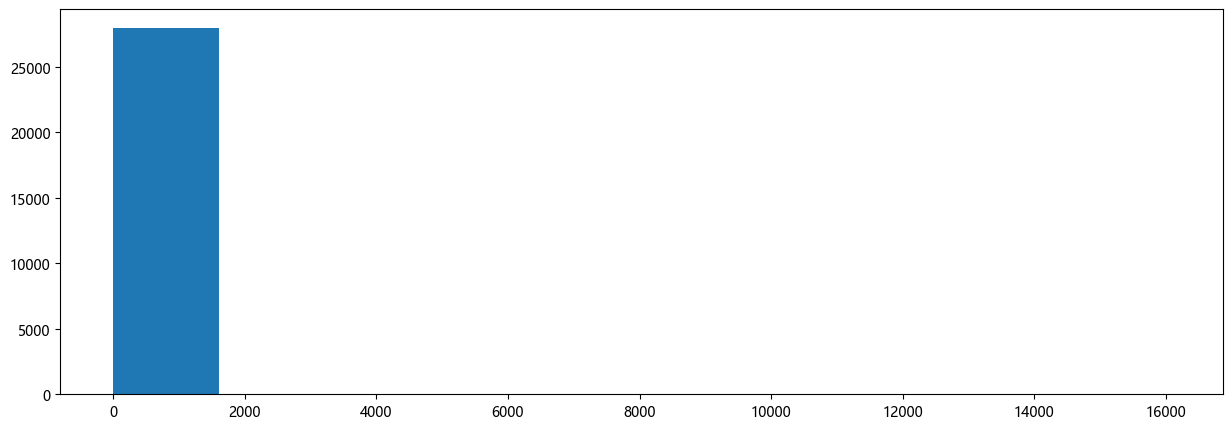

In [125]:
plt.figure(figsize=(15,5))
plt.hist(file_1_data['总金额'])
plt.show()

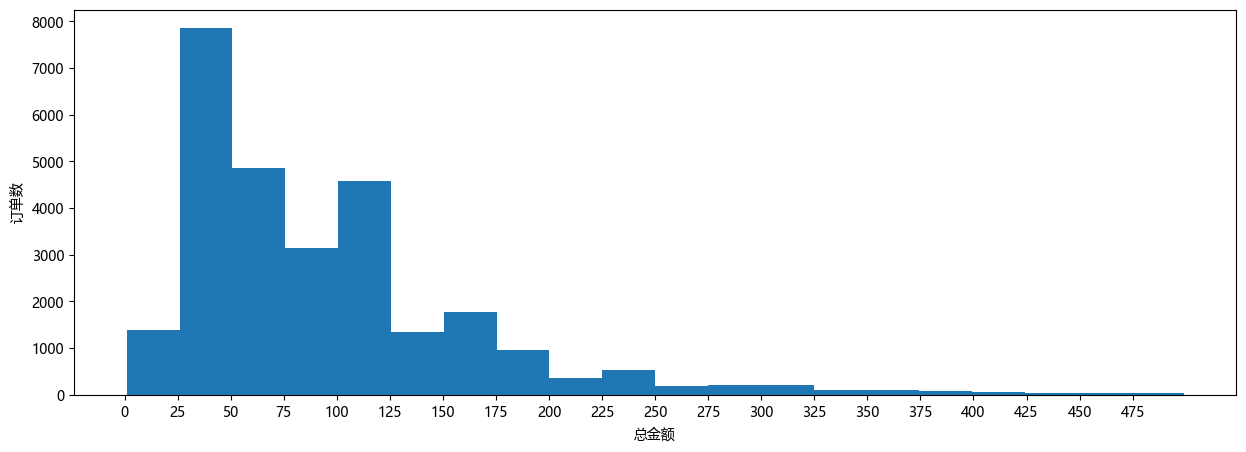

In [126]:
plt.figure(figsize=(15,5))
plt.hist(file_1_data[file_1_data['总金额']<500]['总金额'],bins=20)
plt.xticks(np.arange(0,500,step=25))
plt.xlabel('总金额')
plt.ylabel('订单数')
plt.show()

C:\Users\Cyan\AppData\Local\Temp\ipykernel_20032\1167027518.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cut=file_1_data.groupby(by='总金额区间').count()
C:\Users\Cyan\AppData\Local\Temp\ipykernel_20032\1167027518.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i,j in zip(range(13), [df_cut['总金额'][i] for i in range(len(df_cut['总金额']))]):


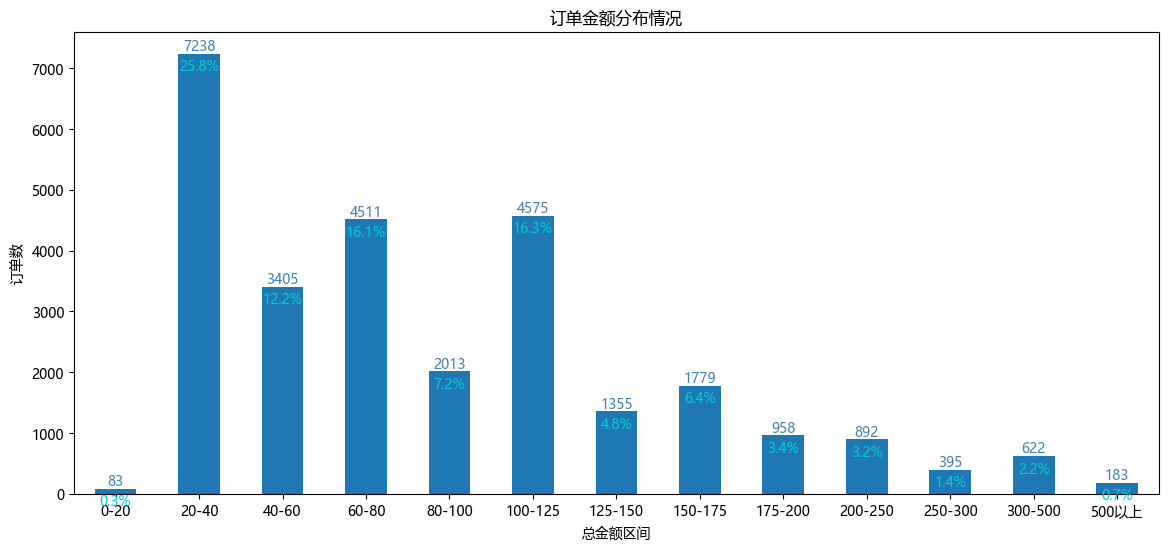

In [127]:
bins=[0, 20, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 500,file_1_data['总金额'].max()]
labels=['0-20', '20-40', '40-60', '60-80', '80-100', '100-125','125-150','150-175','175-200', '200-250', '250-300', '300-500', '500以上']
file_1_data['总金额区间']=pd.cut(file_1_data['总金额'],bins=bins,labels=labels)
df_cut=file_1_data.groupby(by='总金额区间').count()

df_cut['总金额'].plot(kind='bar',figsize=(14,6))
plt.xticks(rotation=0)
plt.ylabel('订单数')
plt.title('订单金额分布情况')
for i,j in zip(range(13), [df_cut['总金额'][i] for i in range(len(df_cut['总金额']))]):
    plt.text(i, j+50, j, horizontalalignment='center',fontdict=dict(color='steelblue'))
    plt.text(i, j-280, '{:.1%}'.format(j/file_1_data.shape[0]), horizontalalignment='center',fontdict=dict(color='darkturquoise'))
plt.show()

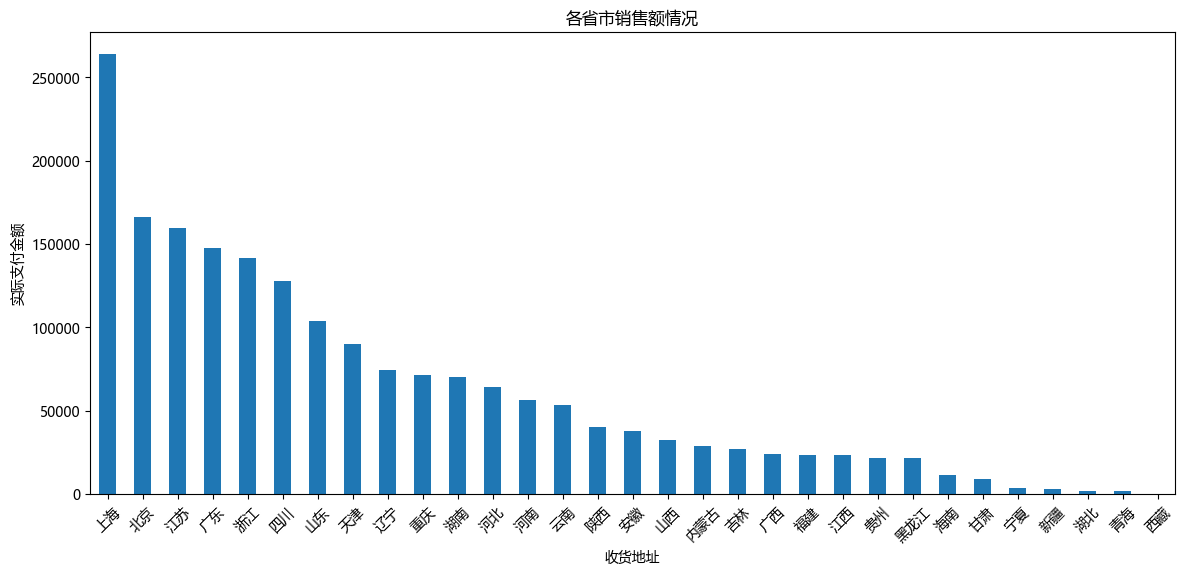

In [128]:
# 分组汇总仅针对买家实际支付金额列
df_dz = (
    file_1_data.groupby(by='收货地址')['买家实际支付金额']
    .sum()
    .sort_values(ascending=False)
)

# 绘制柱状图
df_dz.plot(kind='bar', figsize=(14, 6))
plt.ylabel('实际支付金额')
plt.title('各省市销售额情况')
plt.xticks(rotation=45)  # 设置x轴标签旋转角度
plt.show()


In [129]:
from pyecharts.charts import Map
from pyecharts import options as opts

df_area_list=[list(i) for i in zip(df_dzz.index,df_dzz) ]  #地图数据

map=Map()
map.add('销售额',df_area_list,maptype='china',is_map_symbol_show=True)
map.set_global_opts(visualmap_opts=opts.VisualMapOpts(min_=0, max_=270000, range_color=['#D7E3EF', '#163A69']),
                    title_opts=opts.TitleOpts(title='各省市销售额'),
                   legend_opts=opts.LegendOpts(is_show=False))
map.render('地图.html')

'D:\\研一\\数据工程\\OrderFromTmall\\地图.html'

In [130]:
# 计算各个阶段订单数
from pyecharts.globals import CurrentConfig

# 启用 notebook 渲染
CurrentConfig.NOTEBOOK_TYPE = "jupyter_notebook"  # 如果是 Jupyter Lab，则改为 "jupyter_lab"
#print(CurrentConfig.NOTEBOOK_TYPE)
df_create=file_1_data.shape[0]
df_pay=file_1_data[file_1_data['订单付款时间'].notnull()].shape[0]
df_pay_part=file_1_data[file_1_data['买家实际支付金额']>0].shape[0]
df_pay_all=file_1_data[file_1_data['买家实际支付金额']==file_1_data['总金额']].shape[0]

# 计算转化率
df_funnel=pd.DataFrame()
df_funnel['环节']=['下单','付款','成交','全额成交']
df_funnel['订单量']=[df_create , df_pay , df_pay_part , df_pay_all]
df_funnel['总体转化率']=np.round(df_funnel['订单量']/df_funnel['订单量'][0] *100 ,1)
df_funnel['付款订单转化率']=np.round(df_funnel['订单量'] / df_funnel['订单量'][1] * 100,1)
df_funnel.loc[0,'付款订单转化率']=np.nan

#绘图
from pyecharts import options as opts
from pyecharts.charts import Funnel
funnel = Funnel()
funnel.add("总体转化率", list(zip(df_funnel['环节'],df_funnel['总体转化率'])),gap=5,
          label_opts=opts.LabelOpts(position='inside', formatter='{b}：{c}%'))
funnel.set_global_opts(title_opts=opts.TitleOpts(title='总体转化率', subtitle='相比总下单数'),
                        legend_opts=opts.LegendOpts(is_show=False))
funnel.set_colors(colors=['#B0CDDD', '#5C96BB', '#3470A3', '#163A69'])
funnel.render('总体转化率.html')

'D:\\研一\\数据工程\\OrderFromTmall\\总体转化率.html'

In [131]:
funnel = Funnel()
funnel.add("付款订单转化率", list(zip(df_funnel['环节'][1:],df_funnel['付款订单转化率'][1:])),gap=5,
          label_opts=opts.LabelOpts(position='inside', formatter='{b}：{c}%'))
funnel.set_global_opts(title_opts=opts.TitleOpts(title='付款订单转化率', subtitle='相比付款订单数'),
                        legend_opts=opts.LegendOpts(is_show=False))
funnel.set_colors(colors=['#ffd460', '#ffaa64', '#ff8264'])
funnel.render('订单转化率.html')

'D:\\研一\\数据工程\\OrderFromTmall\\订单转化率.html'